In [2]:
#載入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#載入資料 並簡單看資料集內容
train = pd.read_csv('df1_train.csv')
test_x = pd.read_csv('df1_test1.csv')
test_y = pd.read_csv('df1_test1y.csv')

In [5]:
train.head()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,type_video,cat2,cat3,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,dow1,dow2,dow3,dow4,dow5,dow6,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
test_x.head()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,type_video,cat2,cat3,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,dow1,dow2,dow3,dow4,dow5,dow6,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,120050,0,39040,32021,19712,16,617,58,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,136013,0,1080,2195,934,4,32,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,129600,1,15576,19078,10840,11,238,51,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,138353,0,1536,2903,1407,1,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,131300,0,3594,4319,2468,4,112,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
test_y.head()

,life_post_consumer
0,1183
1,189
2,2327
3,76
4,354


### Q1

In [8]:
#summary statistics
train.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,type_video,cat2,cat3,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,dow1,dow2,dow3,dow4,dow5,dow6,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,0.08250,0.017500,0.260000,0.295000,0.055000,0.045000,0.080000,0.095000,0.08250,0.107500,0.100000,0.065000,0.062500,0.120000,0.097500,0.147500,0.140000,0.130000,0.122500,0.132500,0.167500,0.080000,0.210000,0.070000,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,0.27547,0.131289,0.439184,0.456614,0.228266,0.207564,0.271633,0.293582,0.27547,0.310136,0.300376,0.246835,0.242365,0.325369,0.297009,0.355048,0.347422,0.336725,0.328273,0.339458,0.373889,0.271633,0.407818,0.255467,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
#印出這個資料集的欄位 以及對應資料屬性 可以看到大多數為dummy variable 而且都很乾淨沒有缺失值
print(train.columns)
print(train.shape)
print(train.info())

Index(['life_post_consumer', 'comp_page_like', 'Paid', 'life_post_reach',
       'life_post_impression_liked', 'life_post_reach_liked', 'comment',
       'like', 'share', 'type_link', 'type_status', 'type_video', 'cat2',
       'cat3', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2',
       'dow3', 'dow4', 'dow5', 'dow6', 'hour2', 'hour3', 'hour4', 'hour5',
       'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12',
       'hour13', 'hour14'],
      dtype='object')
(400, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 44 columns):
life_post_consumer            400 non-null int64
comp_page_like                400 non-null int64
Paid                          400 non-null int64
life_post_reach               400 non-null int64
life_post_impression_liked    400 non-null int64
life_post_reach_liked         400 non-null int64
comment               

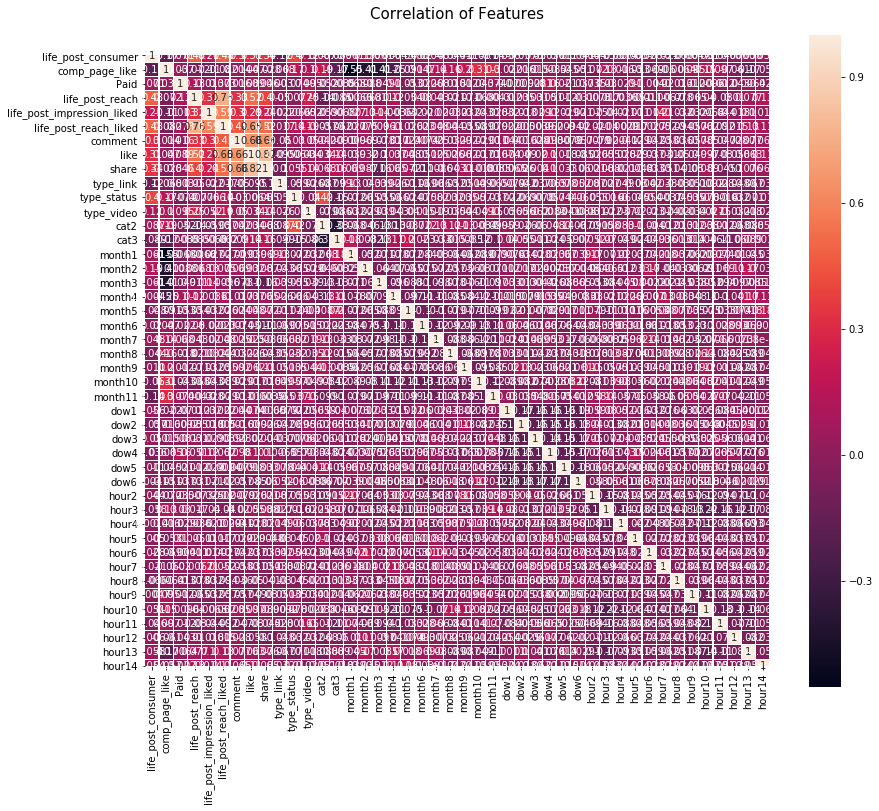

In [10]:
#visualizations of the key variables 畫出相關性熱點圖 因為我們要預測 life_post_consumer
#由圖中可以看出大多數欄位相關性不高 前三欄位為：life_post_reach、life_post_reach_liked、type_status
#因此猜測會是預測 life_post_consumer 最重要的關鍵variables 所以等等在更進階去EDA他們的關係
plt.figure(figsize=(14,12))
plt.title('Correlation of Features',y=1.05,size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)
plt.show()

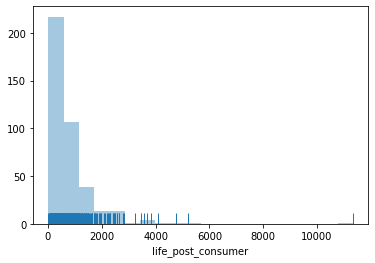

In [11]:
#畫出life_post_consumer的分佈圖 
sns.distplot(train.life_post_consumer, bins=20, kde=False, rug=True)
plt.show()

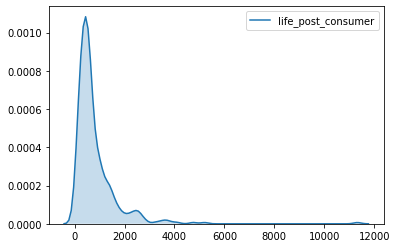

In [12]:
#畫出life_post_consumer的分佈圖  可以看到大多數 集中在1000左右 
sns.kdeplot(train.life_post_consumer, shade=True)
plt.show()

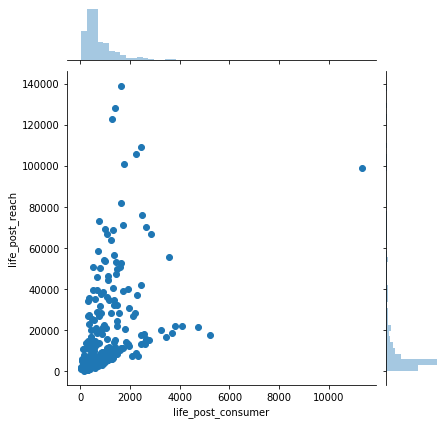

In [13]:
#畫出life_post_consumer和life_post_reach的jointplot 可以看出呈現蠻明顯的正相關，而life_post_consumer數值較為更集中
sns.jointplot(train.life_post_consumer, train.life_post_reach)
plt.show()

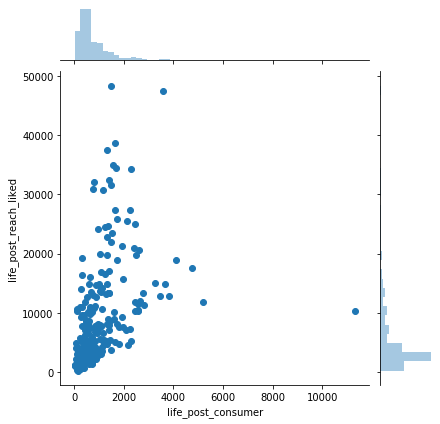

In [14]:
#畫出life_post_consumer和life_post_reach_liked的jointplot 可以看出呈現蠻明顯的正相關，而life_post_consumer數值較為更集中
sns.jointplot(train.life_post_consumer, train.life_post_reach_liked)
plt.show()

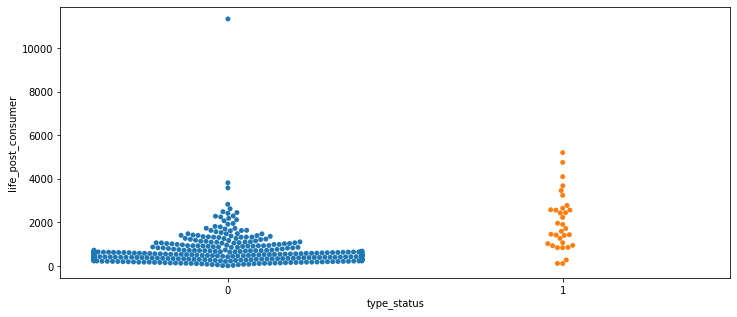

In [15]:
#畫出life_post_consumer和type_status的swarmplot 可以看出以平均來說，當type_status=1時，life_post_consumer的平均值較為高
#且type_status和life_post_consumer 相關也算顯著
fig, ax = plt.subplots(figsize=(12,5))
sns.swarmplot(train.type_status,train.life_post_consumer, edgecolor='white')
plt.show()

### Q2 (Case1)

In [16]:
#將資料分成要用來預測的變數資料夾train_x以及關鍵變數train_y
train_y = train[['life_post_consumer']]
train_x = train.drop(['life_post_consumer'], axis=1)

In [17]:
#算出train_y的平均值
mean_train_y= np.mean(train_y,axis=0)
mean_train_y

life_post_consumer    810.34
dtype: float64

In [18]:
#定義RMSE函數
def RMSE(y, y_pred):
    y=np.array(y)
    y_pred=np.array(y_pred)
    mse = np.mean((y - y_pred)**2) 
    return  np.sqrt(mse)

In [19]:
#用train_y的平均值當作預設值
ypred1 = pd.DataFrame([mean_train_y]*50)

In [20]:
#定義印出前20名結果的函數
def outcome(ypred,test_y):
    ypred=pd.DataFrame(ypred)
    ypred.columns=["predictions"]
    ypred=ypred[:20]
    test_y=test_y[:20].rename(columns={"life_post_consumer": "true outcome values"})
    return pd.concat([ypred,test_y],axis=1)

In [21]:
#印出RMSE
RMSE1=RMSE(test_y,ypred1)
print(RMSE1)

928.8095109332162


In [22]:
#印出predictions and true outcome values for the first 20 data
outcome1=outcome(ypred1,test_y)
outcome1

,predictions,true outcome values
0,810.34,1183
1,810.34,189
2,810.34,2327
3,810.34,76
4,810.34,354
5,810.34,713
6,810.34,204
7,810.34,288
8,810.34,555
9,810.34,586


### Q3 (Case 2A)

In [23]:
#載入sklearn的OLS regression
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(train_x,train_y)
ypred2 = reg1.predict(test_x)

In [24]:
#印出RMSE
RMSE2=RMSE(test_y,ypred2)
print(RMSE2)

692.2891271362014


In [25]:
#印出predictions and true outcome values for the first 20 data
outcome2=outcome(ypred2,test_y)
outcome2

,predictions,true outcome values
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


### Q4 (Case 2B)

In [26]:
#將y給demean 並用其來跑OLS 並會將prediction加回train_y的平均值
train_y_demean = train_y - mean_train_y
test_y_demean = test_y - mean_train_y

In [27]:
reg2 = LinearRegression().fit(train_x,train_y_demean)
ypred3 = reg2.predict(test_x)
ypred3 = ypred3 + np.array([mean_train_y]*50)

In [28]:
#印出RMSE
RMSE3=RMSE(test_y,ypred3)
print(RMSE3)

692.2891271361826


In [29]:
#印出predictions and true outcome values for the first 20 data
outcome3=outcome(ypred3,test_y)
outcome3

,predictions,true outcome values
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


### Q5 (Case 2C) 

In [30]:
#載入sklearn的StandardScaler 用來標準化，並將train_x和test_x 都用train_x資料來做標準化，再跑OLS
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x_standard = scaler.transform(train_x)
test_x_standard = scaler.transform(test_x)

In [31]:
reg3 = LinearRegression().fit(train_x_standard,train_y_demean)
ypred4 = reg3.predict(test_x_standard)
ypred4 = ypred4 + np.array([mean_train_y]*50)

In [32]:
#印出RMSE
RMSE4=RMSE(test_y,ypred4)
print(RMSE4)

692.2891271372005


In [33]:
#印出predictions and true outcome values for the first 20 data
outcome4=outcome(ypred4,test_y)
outcome4

,predictions,true outcome values
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


### Q6 (Case 3A) 

In [34]:
#載入sklearn的Ridge regression
from sklearn.linear_model import Ridge

In [35]:
# alpha_range
alpha_range = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

In [36]:
#依照alpha_range算出RMSE
Ridge1_list=[]
for i in alpha_range:
    clf = Ridge(alpha=i)
    clf.fit(train_x,train_y)
    ypred=clf.predict(test_x)
    Ridge1_list.append(RMSE(test_y,ypred))

In [37]:
Ridge1_list

[691.7564197164961,
 690.4794727071568,
 684.0592940464089,
 666.3743642523864,
 660.5612900111673,
 664.8697142964962,
 690.4193469387994,
 717.1282790306161,
 763.7089594553058,
 773.6019481998379]

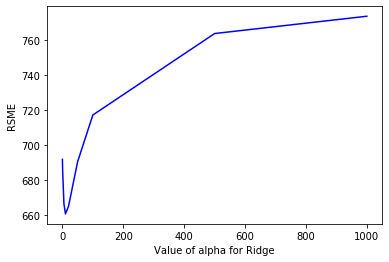

In [38]:
#依照alpha_range算出RMSE，並視覺化
line1, = plt.plot(alpha_range, Ridge1_list, "blue")
plt.xlabel("Value of alpha for Ridge")  
plt.ylabel("RSME")  
plt.show() 

In [39]:
#最佳的RMSE 為當alpha=10時
clf1 = Ridge(alpha=10)
clf1.fit(train_x,train_y)
ypred5=clf1.predict(test_x)

In [40]:
#印出RMSE
RMSE5=RMSE(test_y,ypred5)
print(RMSE5)

660.5612900111673


In [41]:
#印出predictions and true outcome values for the first 20 data
outcome5=outcome(ypred5,test_y)
outcome5

,predictions,true outcome values
0,1068.333624,1183
1,229.755319,189
2,2008.558892,2327
3,-102.874899,76
4,541.457699,354
5,606.459258,713
6,414.982798,204
7,602.810514,288
8,500.184385,555
9,492.306636,586


### Q7 (Case 3B)

In [42]:
#選出連續值的欄位
x_continue=['comp_page_like','life_post_reach','life_post_impression_liked','life_post_reach_liked'
            ,'comment','like','share']
train_x_continue=train_x[x_continue]
test_x_continue=test_x[x_continue]

In [43]:
train_x_binary= train_x.drop(x_continue, axis=1)
test_x_binary= test_x.drop(x_continue, axis=1)

In [44]:
#選出連續值的欄位 並標準化，再跟dummy variable沒有標準化的欄位合併，形成要拿去預測的資料集
scaler2 = StandardScaler()
scaler2.fit(train_x_continue)
train_x_continue_standard = scaler2.transform(train_x_continue)
test_x_continue_standard = scaler2.transform(test_x_continue)

In [45]:
train_x_only_continue_standard=pd.concat([pd.DataFrame(train_x_continue_standard),train_x_binary],axis=1)
test_x_only_continue_standard=pd.concat([pd.DataFrame(test_x_continue_standard),test_x_binary],axis=1)

In [46]:
#依照alpha_range算出RMSE
Ridge2_list=[]
for i in alpha_range:
    clf = Ridge(alpha=i)
    clf.fit(train_x_only_continue_standard,train_y_demean)
    ypred=clf.predict(test_x_only_continue_standard)
    ypred = ypred + np.array([mean_train_y]*50)
    Ridge2_list.append(RMSE(test_y,ypred))

In [47]:
Ridge2_list

[691.7304747036976,
 690.3052303627675,
 681.8131356980053,
 657.2468972576437,
 646.3608224506864,
 645.516812393874,
 666.500310078847,
 692.0599326959294,
 752.843210942966,
 785.4978029227881]

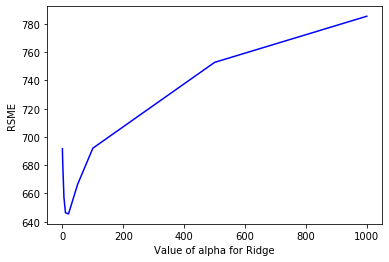

In [48]:
#依照alpha_range算出RMSE，並視覺化
line1, = plt.plot(alpha_range, Ridge2_list, "blue")
plt.xlabel("Value of alpha for Ridge")  
plt.ylabel("RSME")  
plt.show() 

In [49]:
#最佳的RMSE 為當alpha=20時
clf2 = Ridge(alpha=20)
clf2.fit(train_x_only_continue_standard,train_y_demean)
ypred6=clf2.predict(test_x_only_continue_standard)
ypred6 = ypred6 + np.array([mean_train_y]*50)

In [50]:
#印出RMSE
RMSE6=RMSE(test_y,ypred6)
print(RMSE6)

645.516812393874


In [51]:
#印出predictions and true outcome values for the first 20 data
outcome6=outcome(ypred6,test_y)
outcome6

,predictions,true outcome values
0,1142.269542,1183
1,254.157015,189
2,1834.024889,2327
3,15.718169,76
4,599.763663,354
5,635.940390,713
6,427.856444,204
7,603.662060,288
8,514.523788,555
9,580.001060,586


### Q8 (Case 3C)

In [52]:
#依照alpha_range算出RMSE
Ridge3_list=[]
for i in alpha_range:
    clf = Ridge(alpha=i)
    clf.fit(train_x,train_y_demean)
    ypred=clf.predict(test_x)
    ypred = ypred + np.array([mean_train_y]*50)
    Ridge3_list.append(RMSE(test_y,ypred))

In [53]:
Ridge3_list

[691.7564197164965,
 690.4794727071567,
 684.0592940464086,
 666.3743642523862,
 660.5612900111672,
 664.8697142964962,
 690.4193469387993,
 717.128279030616,
 763.7089594553057,
 773.6019481998379]

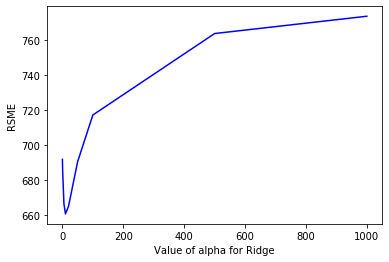

In [54]:
#依照alpha_range算出RMSE，並視覺化
line1, = plt.plot(alpha_range, Ridge3_list, "blue")
plt.xlabel("Value of alpha for Ridge")  
plt.ylabel("RSME")  
plt.show() 

In [55]:
#最佳的RMSE 為當alpha=10時
clf3 = Ridge(alpha=10)
clf3.fit(train_x,train_y_demean)
ypred7=clf3.predict(test_x)
ypred7 = ypred7 + np.array([mean_train_y]*50)

In [56]:
#印出RMSE
RMSE7=RMSE(test_y,ypred7)
print(RMSE7)

660.5612900111672


In [57]:
#印出predictions and true outcome values for the first 20 data
outcome7=outcome(ypred7,test_y)
outcome7

,predictions,true outcome values
0,1068.333624,1183
1,229.755319,189
2,2008.558892,2327
3,-102.874899,76
4,541.457699,354
5,606.459258,713
6,414.982798,204
7,602.810514,288
8,500.184385,555
9,492.306636,586


### Q9 (Case 3D)

In [58]:
#依照alpha_range算出RMSE
Ridge4_list=[]
for i in alpha_range:
    clf = Ridge(alpha=i)
    clf.fit(train_x_standard,train_y_demean)
    ypred=clf.predict(test_x_standard)
    ypred = ypred + np.array([mean_train_y]*50)
    Ridge4_list.append(RMSE(test_y,ypred))

In [59]:
Ridge4_list

[692.2087640655772,
 691.5858824497669,
 688.6097668298786,
 678.5305952097792,
 666.4517811295049,
 646.6515060786201,
 611.0884912149864,
 588.793465752767,
 636.3128466062185,
 701.4633991861974]

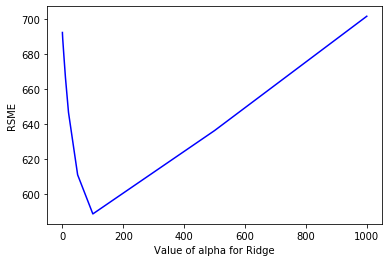

In [60]:
#依照alpha_range算出RMSE，並視覺化
line1, = plt.plot(alpha_range, Ridge4_list, "blue")
plt.xlabel("Value of alpha for Ridge")  
plt.ylabel("RSME")  
plt.show() 

In [61]:
#最佳的RMSE 為當alpha=100時
clf4 = Ridge(alpha=100)
clf4.fit(train_x_standard,train_y_demean)
ypred8=clf4.predict(test_x_standard)
ypred8 = ypred8 + np.array([mean_train_y]*50)

In [62]:
#印出RMSE
RMSE8=RMSE(test_y,ypred8)
print(RMSE8)

588.793465752767


In [63]:
#印出predictions and true outcome values for the first 20 data
outcome8=outcome(ypred8,test_y)
outcome8

,predictions,true outcome values
0,1040.500123,1183
1,278.465050,189
2,1997.724464,2327
3,-21.140365,76
4,554.215257,354
5,602.840642,713
6,337.523470,204
7,599.435785,288
8,470.293704,555
9,500.724140,586


### Q10 (Case 4)

In [64]:
#載入sklearn的Lasso regression
from sklearn.linear_model import Lasso

In [65]:
#依照alpha_range算出RMSE
Ridge5_list=[]
for i in alpha_range:
    clf = Lasso(alpha=i)
    clf.fit(train_x_only_continue_standard,train_y_demean)
    ypred=clf.predict(test_x_only_continue_standard)
    ypred = ypred + np.array([mean_train_y]*50)
    Ridge5_list.append(RMSE(test_y,ypred))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47976963.79253879, tolerance: 32249.892376
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456870.003093511, tolerance: 32249.892376
  positive)


In [66]:
Ridge5_list

[1300.6782746902727,
 1299.420138022585,
 1288.5958382113697,
 1249.8604055219196,
 1209.246823215693,
 1160.894686289992,
 1090.4578105087605,
 1022.4033471297371,
 928.809510933216,
 928.809510933216]

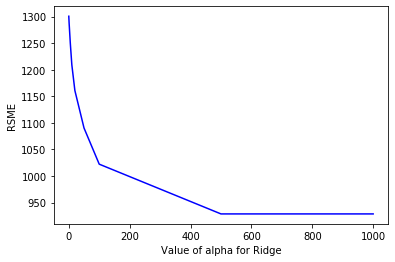

In [67]:
#依照alpha_range算出RMSE，並視覺化
line1, = plt.plot(alpha_range, Ridge5_list, "blue")
plt.xlabel("Value of alpha for Ridge")  
plt.ylabel("RSME")  
plt.show() 

In [69]:
#最佳的RMSE 為當alpha=1000時
clf5 = Lasso(alpha=1000)
clf5.fit(train_x_only_continue_standard,train_y_demean)
ypred9=clf5.predict(test_x_only_continue_standard)
ypred9 = ypred9.reshape((50,1))+ np.array([mean_train_y]*50)

In [70]:
#印出RMSE
RMSE9=RMSE(test_y,ypred9)
print(RMSE9)

928.8095109332162


In [71]:
#印出predictions and true outcome values for the first 20 data
outcome9=outcome(ypred9,test_y)
outcome9

,predictions,true outcome values
0,810.34,1183
1,810.34,189
2,810.34,2327
3,810.34,76
4,810.34,354
5,810.34,713
6,810.34,204
7,810.34,288
8,810.34,555
9,810.34,586


### Q11

In [72]:
#aggregate all cases to summarize the best RMSE of all cases 並用dataframe整理呈現
case=['1','2A','2B','2C','3A','3B','3C','3D','4']
Method=['ymean','OLS','OLS','OLS','Ridge','Ridge','Ridge','Ridge','Lasso']
x_continue=['not used','keep','keep','std.','keep','std.','keep','std.','std.']
x_binary=['not used','keep','keep','std.','keep','keep','keep','std.','keep']
y=['keep','keep','de-mean','de-mean','keep','de-mean','de-mean','de-mean','de-mean']
RSME=[RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7,RMSE8,RMSE9]

In [73]:
df_summary=pd.DataFrame({'case':case,'Method':Method,'x_continue':x_continue,'x_binary':x_binary,'y':y,'RSME':RSME})
df_summary

,case,Method,x_continue,x_binary,y,RSME
0,1,ymean,not used,not used,keep,928.809511
1,2A,OLS,keep,keep,keep,692.289127
2,2B,OLS,keep,keep,de-mean,692.289127
3,2C,OLS,std.,std.,de-mean,692.289127
4,3A,Ridge,keep,keep,keep,660.561290
5,3B,Ridge,std.,keep,de-mean,645.516812
6,3C,Ridge,keep,keep,de-mean,660.561290
7,3D,Ridge,std.,std.,de-mean,588.793466
8,4,Lasso,std.,keep,de-mean,928.809511


從最後的結果可以看到最好的RSME為：Case3D 的588.793466

並且可以發現：

1.Case2A 2B 2C OLS結果一模一樣，無論在有沒有標準化或是demean的情況都是，我猜測跟OLS的數學線性性質有關導致。

2.Case3A 3B 3C 3D Ridge模型表現得較OLS好，將一些多餘的欄位給予懲罰，而有沒有demean的結果一樣，而將所有欄位都標準化的結果表現最好。

3.Case4 Lasso將太多欄位變成0 因此最佳預測值反而變成y_mean，表現結果跟case1一樣。

從這次作業也可以總結當我們 preprocess the features時，我們應該要先將欄位標準化，並也對test用train的資料標準化，至於要不要demean的話，可能要再視模型使用，至少這次迴歸的模型中效果不是太顯著。

最後並視資料集使用最恰當的模型進行預測